# ML Lab

### *Mike Stukalo*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

plt.style.use('ggplot')

## Part I: Preprocessing and EDA

In [2]:
# Load orders dataset

orders = pd.read_csv("./data/Orders.csv", index_col=0)
print(orders.shape)
print(orders.columns)
orders.head()

(51290, 23)
Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')


,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


First, I explore some of the categorical variables

In [3]:
# Explore categorical variables

print("="*100)
print("Ship Modes: ", set(orders['Ship.Mode']))

print("="*100)
print("Segments: ", set(orders['Segment']))

print("="*100)
print("Categories: ", set(orders['Category']))
print("Sub Categories: ", set(orders['Sub.Category']))

print("="*100)
print("States: ", set(orders['State']))
print("-" * 100)
print("Cities: ", set(orders['City']))

print("="*100)
print("Order Priorities: ", set(orders['Order.Priority']))


Ship Modes:  {'Same Day', 'First Class', 'Standard Class', 'Second Class'}
Segments:  {'Home Office', 'Consumer', 'Corporate'}
Categories:  {'Furniture', 'Office Supplies', 'Technology'}
Sub Categories:  {'Paper', 'Phones', 'Tables', 'Envelopes', 'Labels', 'Fasteners', 'Chairs', 'Appliances', 'Art', 'Furnishings', 'Supplies', 'Bookcases', 'Binders', 'Copiers', 'Machines', 'Accessories', 'Storage'}
States:  {'Nagasaki', 'Analamanga', 'Oran', 'Anambra', 'Mostaganem', 'Canelones', 'Manitoba', 'Banaadir', 'South Denmark', 'Guadeloupe', 'Maradi', 'Nzérékoré', 'Mpumalanga', 'Ad Dawhah', 'Eastern Cape', 'Sud', 'Hokkaido', 'Halland', 'Greater Poland', 'Gezira', 'Navarra', 'Galway', 'Dayr Az Zawr', 'Vilnius', 'Oregon', 'Panevezys', 'Francisco Morazán', 'Puebla', 'Kaluga', 'Gharb-Chrarda-Béni Hssen', 'Camagüey', "O'Higgins", 'Georgia', 'Skåne', 'Laayoune', 'Erzurum', 'Normandy', 'Maluku', 'Dhi Qar', 'Central Jutland', 'Donetsk', 'Kherson', 'Basilicata', 'Chinandega', 'Tabuk', 'Montserrado', 'Hor

We have:

4 ship modes (Same Day, Standard, Second and First class)

3 segments (Corporate, Consumer, Home Office)

3 categories and 17 subcategories

4 order priorities (Critical, Low, Medium, High)

And a large number of shipping destinations.



### Question 1

We are converting sales and profit into numeric

In [4]:
def removeDollars(x):
    '''
    A helper function that takes a sting with monetary value, removes $ sign and commas, and returns a numeric
    '''
    x = re.sub(pattern="\$|,", repl="", string=x)
    
    return float(x)

orders['Sales'] = orders['Sales'].apply(lambda x: removeDollars(x)) 
orders['Profit'] = orders['Profit'].apply(lambda x: removeDollars(x)) 



Below is the descripctive statistics for numerical variables.

In [6]:
# Descriptive stats
orders.describe()

,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
count,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,246.490685,3.476545,0.142908,28.610970,26.478567
std,32063.693350,487.565388,2.278766,0.212280,174.341066,57.251373
min,1040.000000,0.440000,1.000000,0.000000,-6599.980000,1.002000
25%,23223.000000,30.762500,2.000000,0.000000,0.000000,2.610000
50%,56430.500000,85.055000,3.000000,0.000000,9.240000,7.790000
75%,90008.000000,251.055000,5.000000,0.200000,36.810000,24.450000
max,99301.000000,22638.480000,14.000000,0.850000,8399.980000,933.570000


### Question 2

We explore seasonality of the orders. 

First, lets see the seasonality for all products combined without division into categories.

In [7]:
# Create a new dataframe with quantity, Sales, Category and OrderDate

df1 = orders.loc[:, ["Sales", "Quantity", "Category", "Order.Date" ]]
df1['Order.Date'] = pd.to_datetime(df1['Order.Date'])
df1['Month'] = df1['Order.Date'].apply(lambda x: int(x.strftime('%m')))
df1['Year'] = df1['Order.Date'].apply(lambda x: int(x.strftime('%Y')))
df1['Mnth'] = df1['Year']*100 + df1['Month']
df1['Mnth'].astype("category")

df1.head()


,Sales,Quantity,Category,Order.Date,Month,Year,Mnth
Row.ID,,,,,,,
40098,221.98,2,Technology,2014-11-11,11,2014,201411
26341,3709.40,9,Furniture,2014-02-05,2,2014,201402
25330,5175.17,9,Technology,2014-10-17,10,2014,201410
13524,2892.51,5,Technology,2014-01-28,1,2014,201401
47221,2832.96,8,Technology,2014-11-05,11,2014,201411


Text(0.5,1,'Number of Orders by Date')

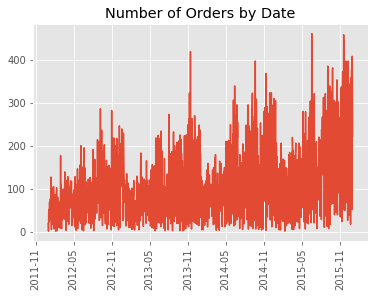

In [8]:
# Plot timeseries of orders
plot1 = df1.groupby('Order.Date').sum()
plt.plot(plot1.Quantity)
plt.xticks(rotation='vertical')
plt.title("Number of Orders by Date")

Text(0.5,1,'Number of Orders by Month')

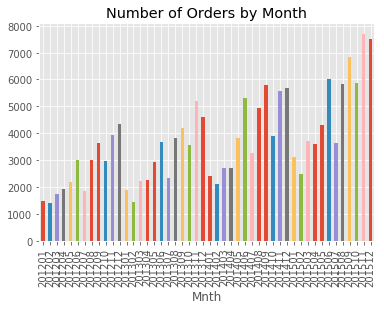

In [9]:
# By month
plot2 = df1.groupby('Mnth').sum()
plot2.Quantity.plot(kind="bar")
plt.xticks(rotation='vertical')
plt.title("Number of Orders by Month")


It looks like the spike in orders happens closer to the year end. Also in each quarter the last month appears to bring more orders than other months.

Let's look at seasonality by categories.


(array([734442., 734624., 734808., 734989., 735173., 735354., 735538.,
        735719., 735903.]), <a list of 9 Text xticklabel objects>)

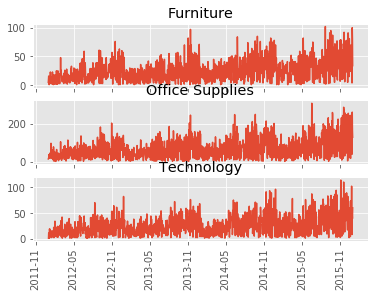

In [10]:
# Plot timeseries of orders by Categories
plot3 = df1.groupby(['Order.Date','Category']).sum().reset_index()

groups = [*set(plot3['Category'])]

fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)

for i, group in enumerate(groups):
        tmp_ = plot3.loc[plot3.Category==group, ['Quantity','Order.Date']]
        axs[i].plot(tmp_['Order.Date'], tmp_['Quantity'])
        axs[i].set_title(group)
        
        
plt.xticks(rotation='vertical')
        
        

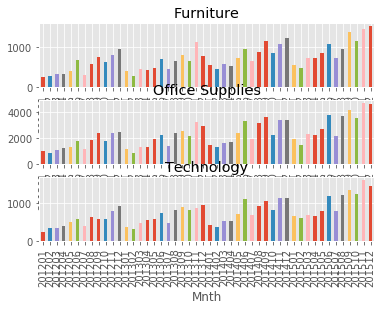

In [11]:
# By month
plot4 = df1.groupby(['Mnth','Category']).sum().reset_index()

groups = [*set(plot4['Category'])]

for i, group in enumerate(groups):
    plt.subplot(3,1,i+1)
    tmp_ = plot4.loc[plot4.Category==group, :]
    tmp_ = tmp_.set_index("Mnth")
    tmp_.Quantity.plot(kind="bar")
    plt.xticks(rotation='vertical')
    plt.title(group)


        

        

Visually, the seasonality looks very similar across product groups. But we can test in statistically.

But first, to address the fact that the number of orders grows year to year, we calculate the share of each month in the annual count of orders.

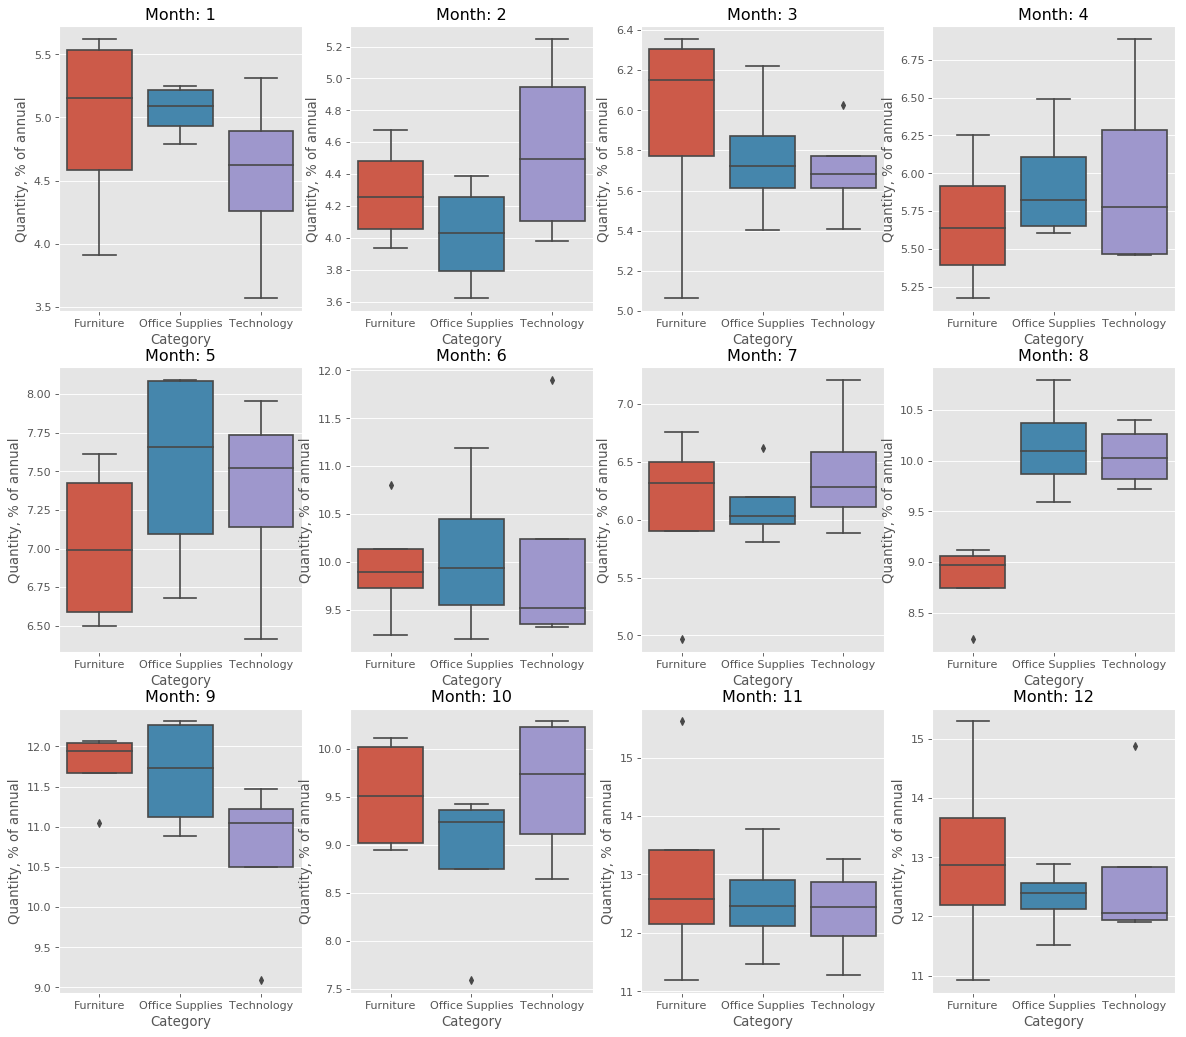

In [13]:

# Calculate share of each month in each category's annual sales
mean_orders_pct = df1.groupby(['Category','Month', 'Year']).sum().reset_index() # Calculate monthly orders
mean_orders_pct = mean_orders_pct.groupby(['Category','Month', 'Year']).agg({'Quantity': 'sum'})
mean_orders_pct = mean_orders_pct.groupby(['Category', 'Year']).apply(lambda x: 100 * x / float(x.sum())).reset_index()\
                    .sort_values(["Category","Year", "Month"])

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i in range(1,13):
    plt.subplot(3,4,i)
    
    tmp_ = mean_orders_pct.loc[mean_orders_pct.Month==i, ['Quantity', 'Category']]
    
    sns.boxplot(x=tmp_['Category'], y=tmp_['Quantity'])
    
    name = "Month: " + str(i)
    plt.title(name)
    plt.ylabel('Quantity, % of annual')



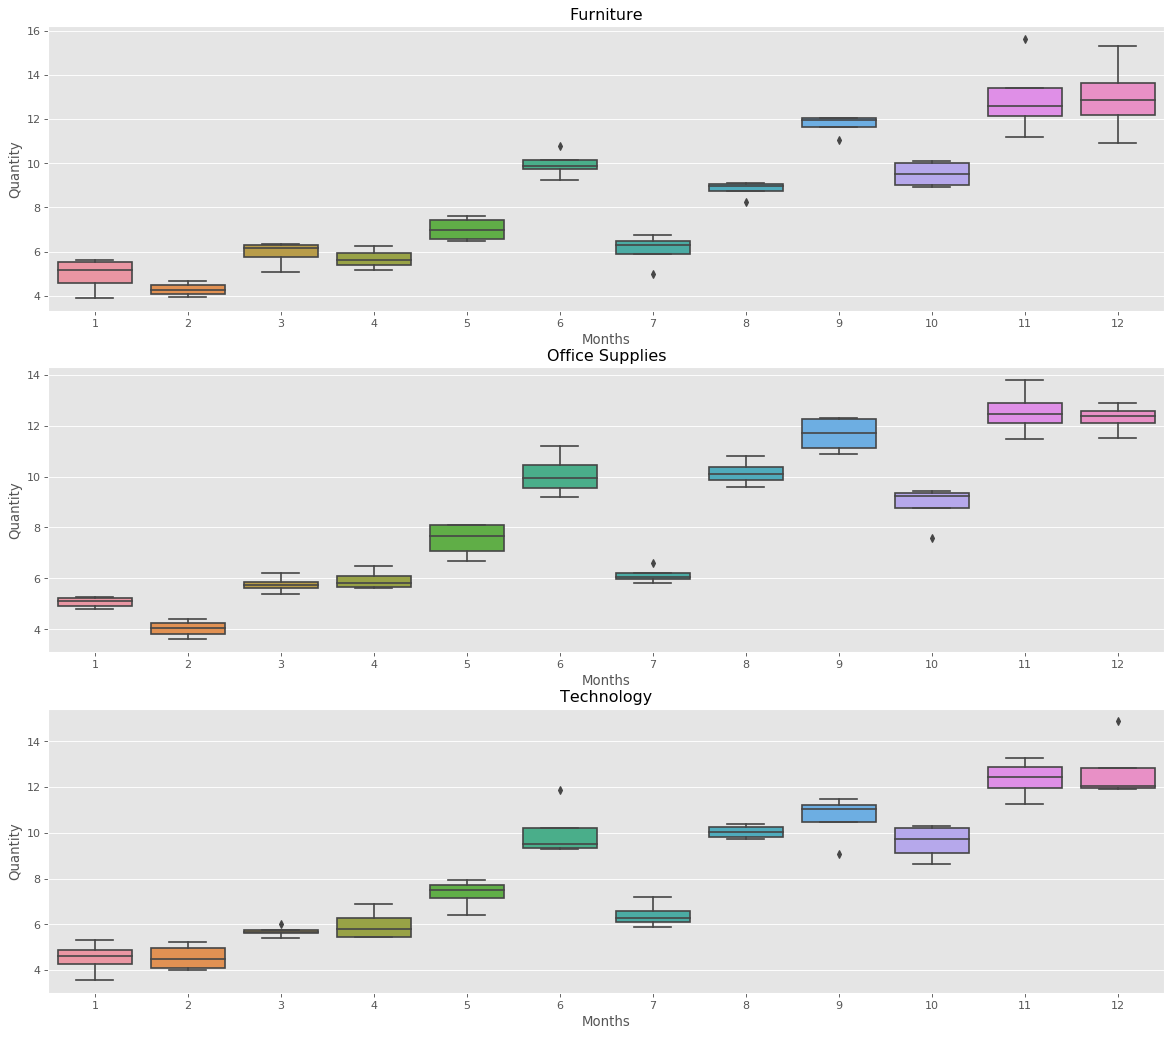

In [14]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i, group in enumerate(groups):
    plt.subplot(3,1,i+1)
    
    tmp_ = mean_orders_pct.loc[mean_orders_pct.Category==group,['Quantity','Month']]
    
          
    sns.boxplot(x=tmp_['Month'], y=tmp_['Quantity'])
    
    plt.title(group)
    plt.xlabel("Months")

We run ANOVA analysis to see if there is a difference among means of monthly share of orders. 

In [17]:
# Run anova

# All categories
mean_orders = df1.groupby(['Month', 'Year']).sum().reset_index() # Calculate monthly orders
mean_orders = mean_orders.groupby(['Month', 'Year']).agg({'Quantity': 'sum'})
mean_orders = mean_orders.groupby(['Year']).apply(lambda x: 100 * x / float(x.sum())).reset_index()\
                    .sort_values(["Year", "Month"])

results = ols('Quantity ~ C(Month)', data=mean_orders).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Month),393.537464,11.0,124.740314,3.118623e-25
Residual,10.324976,36.0,NaN,NaN


We can conclude that there is a difference (p-value is O(e-25)).

We run Turkey's HSD test to see the difference in means.

In [18]:
mc = MultiComparison(mean_orders['Quantity'], mean_orders['Month']) # Multicomparison
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.7568  -2.0785  0.5649 False 
  1      3     0.8516  -0.4702  2.1733 False 
  1      4     0.9586  -0.3631  2.2803 False 
  1      5     2.4569   1.1351  3.7786  True 
  1      6     5.1064   3.7847  6.4281  True 
  1      7     1.2379  -0.0838  2.5596 False 
  1      8     4.9368   3.6151  6.2585  True 
  1      9     6.5507   5.2289  7.8724  True 
  1      10    4.2141   2.8924  5.5358  True 
  1      11    7.6567   6.3349  8.9784  True 
  1      12    7.5886   6.2668  8.9103  True 
  2      3     1.6084   0.2867  2.9301  True 
  2      4     1.7154   0.3937  3.0371  True 
  2      5     3.2137   1.892   4.5354  True 
  2      6     5.8632   4.5415  7.185   True 
  2      7     1.9947   0.673   3.3165  True 
  2      8     5.6936   4.3719  7.0153  True 
  2      9     7.3075   5.9858  8.6292  True 
  2      10    4.9709   3.649

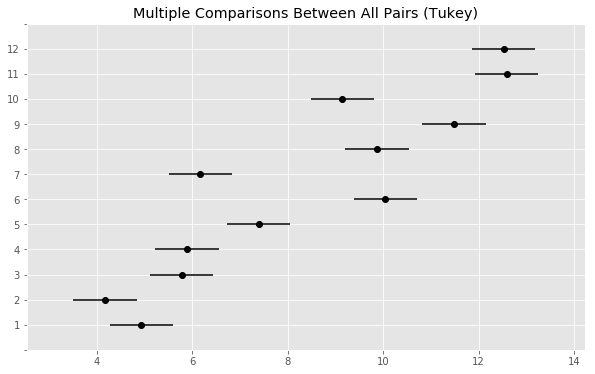

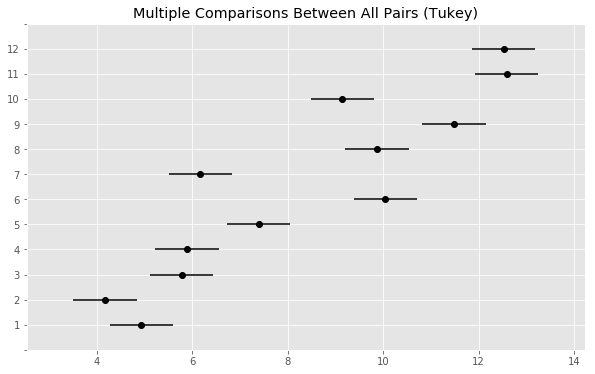

In [19]:
mc_results.plot_simultaneous()

We can see that Noverber, December and Septermber orders have much higher shares compared to other months. And the difference between these months and other months is statistically significant.

We can perform a similar analysis for categories.

In [64]:
# Run anova
results = ols('Quantity ~ C(Month)', data=mean_orders_pct).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

    

,sum_sq,df,F,PR(>F)
C(Month),1185.295468,11.0,174.093443,6.982233e-73
Residual,81.700640,132.0,NaN,NaN


In [20]:
for category, grouped_df in mean_orders_pct.groupby('Category'):
    print('Category {}\n'.format(category), pairwise_tukeyhsd(grouped_df['Quantity'], grouped_df['Month']))

Category Furniture
 Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.6783  -2.9443  1.5877 False 
  1      3     0.9705  -1.2955  3.2365 False 
  1      4     0.7152  -1.5508  2.9812 False 
  1      5     2.0617  -0.2043  4.3277 False 
  1      6     4.9991   2.7331  7.2651  True 
  1      7     1.1292  -1.1368  3.3951 False 
  1      8     3.8662   1.6003  6.1322  True 
  1      9     6.7937   4.5277  9.0597  True 
  1      10    4.5625   2.2965  6.8285  True 
  1      11    8.0357   5.7697 10.3017  True 
  1      12    8.0288   5.7628 10.2948  True 
  2      3     1.6487  -0.6173  3.9147 False 
  2      4     1.3935  -0.8725  3.6595 False 
  2      5      2.74    0.474   5.006   True 
  2      6     5.6774   3.4114  7.9434  True 
  2      7     1.8074  -0.4586  4.0734 False 
  2      8     4.5445   2.2785  6.8105  True 
  2      9     7.472    5.206   9.738   True 
  2      

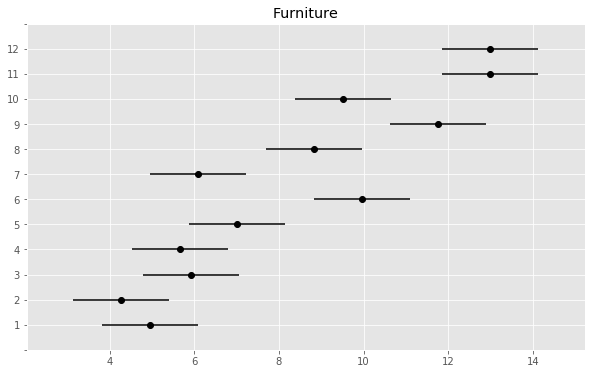

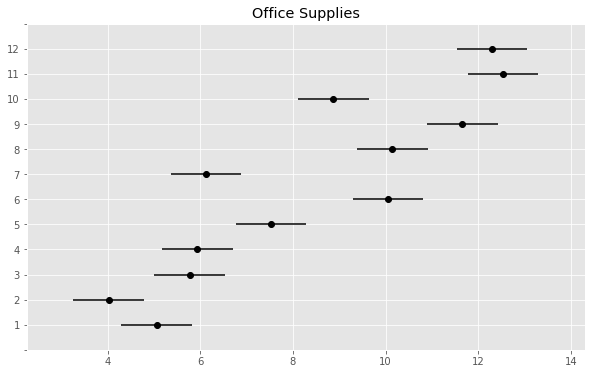

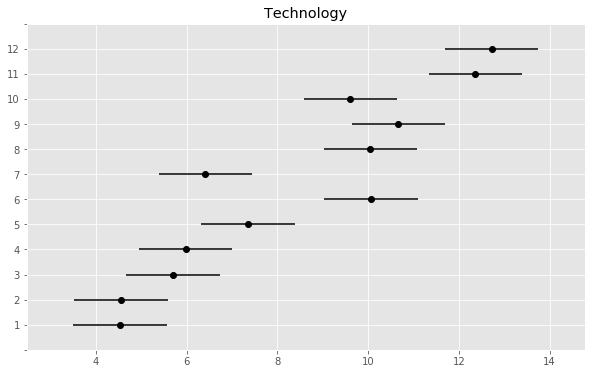

In [21]:
for category, grouped_df in mean_orders_pct.groupby('Category'):
    mc = MultiComparison(grouped_df['Quantity'], grouped_df['Month']) # Multicomparison
    mc_results = mc.tukeyhsd()
    mc_results.plot_simultaneous()
    plt.title(category)

We see that such a seasonality is typical for all categories. The only slight exception is Tehnology, where September share does not differ significantly from the shares of October, August, and June.

### Question 3

In [22]:
# Read returns data

returns = pd.read_csv("./data/Returns.csv")
returns.columns = returns.columns.str.replace("Order ID", "Order.ID") #Rename Order.ID fto match orders
returns.head()


,Returned,Order.ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


We merge returns data with orders

In [23]:
df = pd.merge(orders, returns[['Order.ID','Returned']], on = 'Order.ID', how="left")
df['Returned'] = df['Returned'].fillna('No') 
df.head(200)

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned
0,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.00,62.15,40.770,High,No
1,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.630,Critical,No
2,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.490,Medium,No
3,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.160,Medium,No
4,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.040,Critical,No
5,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,New South Wales,...,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.68,5,0.10,763.28,897.350,Critical,No
6,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,Wellington,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.00,564.84,894.770,Critical,No
7,IN-2013-MB1808592-41378,4/14/13,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,Waikato,...,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.00,996.48,878.380,High,No
8,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.00,54.71,25.270,High,No
9,CA-2012-AB10015140-40974,3/6/12,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.20,5.48,11.130,High,No


Let us see how many customers returned more than once

In [24]:
df.loc[df.Returned=="Yes", :].groupby('Customer.ID').agg({'Order.ID':'count'}).count()

Order.ID    1061
dtype: int64

1061 customer returned goods at least once.

What about more than 5 times?

In [25]:
more5 = df.loc[df.Returned=="Yes", :].groupby('Customer.ID').agg({'Order.ID':'count'})
more5.loc[more5['Order.ID']>5,:].count()

Order.ID    46
dtype: int64

46 customers returned orders more than 5 times.

In [26]:
df.loc[df.Returned=="Yes", :].groupby('Region').agg({'Order.ID':'count'}).sort_values('Order.ID').tail(1)

,Order.ID
Region,
Central America,248


In [28]:
df.loc[df.Returned=="Yes", :].groupby('Category').agg({'Order.ID':'count'}).sort_values('Order.ID').tail(1)

,Order.ID
Category,
Office Supplies,1348


In [29]:
df.loc[df.Returned=="Yes", :].groupby('Sub.Category').agg({'Order.ID':'count'}).sort_values('Order.ID').tail(1)

,Order.ID
Sub.Category,
Binders,269


Most returns came from Central America. The most returned orders are Office Supplies (Binders).

We can also look at returns in terms of their share in Region, Category, and SubCategory orders.

In [32]:
# Calculate as percentage of all orders by region
all_orders = df.groupby('Region').agg({'Order.ID':'count'})
ret_orders = df.loc[df.Returned=="Yes", :].groupby('Region').agg({'Order.ID':'count'})
percent_return = ret_orders/all_orders
percent_return.sort_values('Order.ID').tail(1)


,Order.ID
Region,
Western US,0.055261


In [33]:
# Calculate as percentage of all orders by Category
all_orders = df.groupby('Category').agg({'Order.ID':'count'})
ret_orders = df.loc[df.Returned=="Yes", :].groupby('Category').agg({'Order.ID':'count'})
percent_return = ret_orders/all_orders
percent_return.sort_values('Order.ID').tail(1)

,Order.ID
Category,
Technology,0.043881


In [34]:
# Calculate as percentage of all orders by region
all_orders = df.groupby('Sub.Category').agg({'Order.ID':'count'})
ret_orders = df.loc[df.Returned=="Yes", :].groupby('Sub.Category').agg({'Order.ID':'count'})
percent_return = ret_orders/all_orders
percent_return.sort_values('Order.ID').tail(1)

,Order.ID
Sub.Category,
Labels,0.052672


This way, we can see that out of all regions, if the order comes from the Western US is is more likely to be returned (5.5% of Western US orders get returned). In categories and subcategories, the most likely to be return are Technology (4.3%) and Labels (5.2%), respectively.

### End of Part I

For Part II please see file [PartTwo](./PartTwo.ipynb)

In [30]:
# Save dataframe to use in Part Two
df.to_csv("./data/df.csv", index=False)